# The Atoms of Computation

量子コンピュータのプログラミングは今や誰でも自分の家で快適に行うことができます。
しかし、何を作成するか？量子プログラムとは何なのか？実際のところ、量子コンピュータとは何なのか？
これらの質問は、標準的なデジタルコンピュータと比較することで回答できます。
しかし、残念ながらほとんどの人はデジタルコンピュータの仕組みも実際には理解していません。この記事では、これらのデバイスの背後にある基本原則について説明します。
後で量子コンピューティングに移行できるように、量子で使用するのと同じツールを使用して実行します。

In [1]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

## 情報をビットに分割する

私たちが
最初に知る必要があるのは、ビットの概念です。
これらは、世界で最も単純なアルファベットになるように設計されています。
0と1の2文字のみで、あらゆる情報を表すことができます。

1つの例は数値です。恐らく10桁の文字列
0,1,2,3,4,5,6,7,8,9
を使用して数字の文字列では、各数字は数値に含まれる回数を表す。


通常、10進数に基づいて計算をしますが、
他のルールに基づいたシステムも同じように簡単に使用できる。
例えば、2進数は2に基づいている。
つまり2つの文字、0と1を用いて、2の累乗の倍数として数値を表す。
例えば、9213は10001111111101になる。
この2進数では、10,100,1000などではなく、2,4,8,16,32などの倍数として数値を表現している。

バイナリ文字列として知られているこれらのビット文字列は、単なる数値以外のものを表すために使用できる。
例えば、ビットを使用してテキストを表現する方法がある。
使用する文字、数字、または句読点については、このテーブル(以下のリンク)を使用して最大8ビットの対応する文字列を見つけることができる。
これらはかなり恣意的ですが、これは広く合意されている標準です。
実際、それはこの記事をインターネットを通じてあなたに送信するために使用されたものです。
https://www.ibm.com/support/knowledgecenter/en/ssw_aix_72/network/conversion_table.html

これがコンピュータ内の全ての情報を表現する方法です。
例えそれが、数字だろうが、文字だろうが、画像だろうが、音だろうが、このバイナリ文字列の形で存在します。

私たちの標準的なコンピュータと同様に、量子コンピュータも同じ基本的な考え方を基にしています。
主な違いは、量子コンピュータはビットとして量子力学的に拡張した、qubits(量子ビット)を使用している点です。
このテキストの残りの部分では、qubitとはなんなのか、なにができるのか、そしてそれをどのように行うのかについて学んでいきます。
ただし、このセクションでは、量子については全く触れていません。
従って、ビットのようにqubitを使用します。

## ダイアグラムとしての計算

qubitを使用する場合でも、古典ビットを使用する場合でも、入力を必要な出力に変換するために、それらを操作する必要がある。
少数のビットを扱う単純なプログラムの場合、このプロセスを回路図と呼ばれる図で表すと便利。
左側に入力、右側に出力があり、その間に秘術記号で表される操作がある。これらの操作は、主に歴史的な理由から「gates("ゲート")」と呼ばれる。

量子コンピュータの場合、基本的な考え方は古典コンピュータと同じですが、入力、出力、及び演算に使用されるシンボルを表す方法については、異なる規則がある。
このセクションの残りの部分では、どうやって回路を作成するかを学んでいきます。
このセクションが終わるときには、どうやって回路を作り、回路がなにをして、なぜ回路が便利か分かっていることでしょう。

## 始めての量子回路

回路では、通常3つのジョブを実行する必要がある。
・入力をエンコード
・実際の計算を実行
・出力を抽出
最初の量子回路では、これらの最後の仕事に焦点を当てる。
まず、8つのqubitsと8つの出力を持つ回路を作成する。

In [2]:
n = 8
n_q = n
n_b = n
qc_output = QuantumCircuit(n_q,n_b)

今作った"qc_output"という名前の回路はQiskitの"QuantumCircuit"を使って作成されます。
数値"n_q"は回路内のqubitの数を定義しています。
"n_b"を使って、最後に回路から抽出する出力ビット数を定義します。

量子回路の出力の抽出には「measure("測定")」と呼ばれる操作を使用して行われる。
各測定は、特定のqubitに特定の出力ビットに出力するように指示する。
次のコードは、8つのqubitのそれぞれに測定操作を追加する。
qubitsとbitsは0から7の番号でラベル付けされています。(プログラマーがそうしたいから)
"qc.measure(j,j)"は出力をビットjに書き込むようにqubitjに指示する測定値を回路である"qc"に追加します。

In [3]:
for j in range(n):
    qc_output.measure(j,j)

これで、回路に何かができたので、見てみましょう。

In [4]:
qc_output.draw()

┌─┐                     
q_0: ┤M├─────────────────────
     └╥┘┌─┐                  
q_1: ─╫─┤M├──────────────────
      ║ └╥┘┌─┐               
q_2: ─╫──╫─┤M├───────────────
      ║  ║ └╥┘┌─┐            
q_3: ─╫──╫──╫─┤M├────────────
      ║  ║  ║ └╥┘┌─┐         
q_4: ─╫──╫──╫──╫─┤M├─────────
      ║  ║  ║  ║ └╥┘┌─┐      
q_5: ─╫──╫──╫──╫──╫─┤M├──────
      ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ─╫──╫──╫──╫──╫──╫─┤M├───
      ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ─╫──╫──╫──╫──╫──╫──╫─┤M├
      ║  ║  ║  ║  ║  ║  ║ └╥┘
c_0: ═╩══╬══╬══╬══╬══╬══╬══╬═
         ║  ║  ║  ║  ║  ║  ║ 
c_1: ════╩══╬══╬══╬══╬══╬══╬═
            ║  ║  ║  ║  ║  ║ 
c_2: ═══════╩══╬══╬══╬══╬══╬═
               ║  ║  ║  ║  ║ 
c_3: ══════════╩══╬══╬══╬══╬═
                  ║  ║  ║  ║ 
c_4: ═════════════╩══╬══╬══╬═
                     ║  ║  ║ 
c_5: ════════════════╩══╬══╬═
                        ║  ║ 
c_6: ═══════════════════╩══╬═
                           ║ 
c_7: ══════════════════════╩═

qubitsは常に0を出力するように初期化されています。
私たちが回路に何もしなかった為、これを測定すると正確にこの結果が得られます。
回路を何度も実行し、結果をヒストグラムにプロットすることで確認できます。
結果は常に"00000000"隣、各qubitからの0であることがわかります。

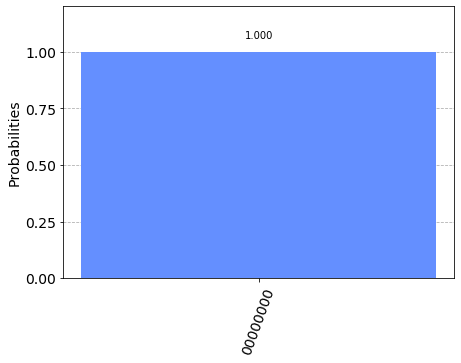

In [5]:
counts = execute(qc_output,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

何回も実行して結果をヒストグラムとして表示するのは、量子コンピュータの結果にランダム性がある為です。
この場合、私たちは何もしていないので、確実に"00000000"の結果を取得する。

注意すべきは、この結果は「理想的な量子コンピュータが何をするかを計算する標準コンピュータである量子シミュレーターから得られている」ということ。
シミュレーションは少数のqubit(〜30qubits)でのみ可能だが、それでも最初の量子回路を設計する場合には非常に便利なツールです。
実際のデバイスで実行するには、"Aer.get_backend("qasm_simulator")"を使用するデバイスのバックエンドオブジェクトに置き換えるだけ。

## 入力をエンコードする

次に、別のバイナリ文字列を入力してエンコードする方法を見てみましょう。
これには、"NOT gate(ノットゲート)"と呼ばれるものが必要です。
NOT gateはコンピュータで実行できる最も基本的な操作です。
それは単にビット値を反転させます。
0は1になり、1は0になります。
qubitの場合、NOTの機能を実行するのは"x"と呼ばれる操作です。

以下では、エンコーディングの作業専用の新たな回路を作成し、"qc_encode"と呼んでいる。
ここでは、qubitの数のみを指定する。

In [6]:
qc_encode = QuantumCircuit(n)
qc_encode.x(7)

qc_encode.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          
q_6: ─────
     ┌───┐
q_7: ┤ X ├
     └───┘

結果の抽出は、以前の回路"qc_output"を使用して実行できる。
qc_encode + qc_outputを使用して、2つの回路を追加すると、出力を抽出するために必要なもの全てが最後に追加された、新しい回路が作成される。

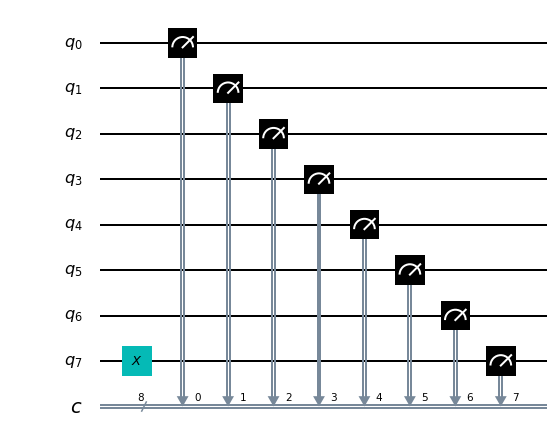

In [7]:
qc = qc_encode + qc_output
qc.draw(output='mpl',justify='none')

これで、組み合わせた回路を実行して結果を確認できます。

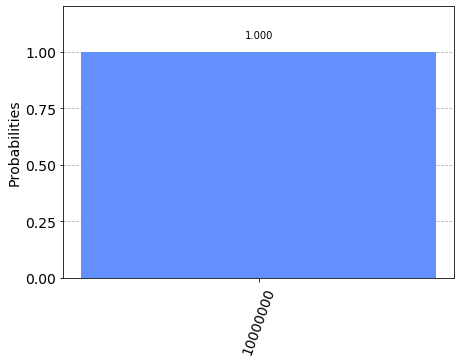

In [8]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

これで、コンピュータは文字列"10000000"を出力します。

qubit7から取得した、反転したビットは、ストリングの左端にあたります。これは、Qiskitが文字列のビットに右から左に番号をつける為です。逆の方法でビットに番号をつけることを好む人もいますが、ビットを使用して数値を表す場合、Qiskitのシステムの方が利点がある。
具体的にはqubit7は2^7(128)がいくつあるかを教えてくれることを意味する。
従って、このビットを反転することで、128という数字をシンプルな8ビットコンピュータに書き込んだことになる。

では、自分用に別の番号を書いてみよう。
例えば、あなたの年齢をすることができる。
検索エンジンを使用して、数値がバイナリでどのように表示されるかを調べ64歳未満の場合は左側に幾つかの0を追加します。

In [9]:
qc_encode = QuantumCircuit(n)
qc_encode.x(2)
qc_encode.x(4)

qc_encode.draw()

q_0: ─────
          
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     └───┘
q_3: ─────
     ┌───┐
q_4: ┤ X ├
     └───┘
q_5: ─────
          
q_6: ─────
          
q_7: ─────

これで、コンピュータで情報をエンコードする方法がわかりました。
次のステップは、それを処理することです。
エンコードした入力を受け取り、必要な出力に変換します。

## どうやって追加するか記憶する(4.2)

入力を出力に変換することを検討するには、解決する問題が必要です。
基本的な計算をしましょう。
小学校では、大きな数字の問題を、扱いやすい部分に分解する方法を学びます。
例えば、次の問題をどのように解きますか？

9213 + 1854 =  ????

1つの方法は、右から左に1桁ずつ行うことです。
3 + 4から始めて

9213 + 1854 = ???7

次に 1 + 5

= ??67

次に、2 + 8 = 10をして、これは2桁の答えになるから、次の列に持ち越す必要が出てくる
そして、9 + 1 + 1 = 11をやって、答えである11067を得る

9213 + 1854 = 11067

これは単純な足し算だが、全てのアルゴリズムの背後にある原理を示している。
アルゴリズムが数学の問題を解決するように設計されているか、テキストや画像を処理するように設計されているかに関係なく、私たちは常に大きなタスクを小さく単純なステップに分解する。

コンピュータで実行するにはアルゴリズムを可能な限り最小かつ最も単純な手順にコンパイルする必要がある。これらがどのように見えるかを確認するために、今の問題をバイナリでもう一度実行してみましょう。

10001111111101 + 00011100111110 = ??????????????

2つ目の数値の左側には、余分な0がたくさんあることに注意。
これは2つのストリングを同じ長さにするのに役立つ。

最初のタスクは、右側の列を 1 + 0すること。バイナリでは、他の数値システムと同様に、答えは= 1。
2番目の列の0 + 1でも同じ結果が得られる。

10001111111101 + 00011100111110 = ????????????11

次は、1 + 1です。　ご存知の通り、1 + 1 = 2
バイナリでは、数値2は10と書かれるため、2ビットが必要。
つまり、10進数の10の場合と同様に、1を次の桁に持っていく必要がある。

次の桁では、1 + 1 + 1を計算する必要がある。これは、3つの数値を加算することを意味するため、コンピュータにとって複雑になっています。
それでも、より簡単な操作にコンパイルして、2ビットを加算するだけで済むようにコンパイルできる。
そのために、最初の2つの1から始めることができる。

1 + 1 = 10

次に、この10を最後の1と足す必要がある。
これは、通常の方法を使用して実行できる。

10 + 01 = 11

結果、答えは11(10進数でいう3)を得られました。

これで、元の問題に戻ることができる。
答えが11だったので、また1を次の桁に持っていきます。
さて、そうするとまた1 + 1 + 1をします。
しかし、その方法は既に分かっているので、大したことではありません。

実際、残った計算は全て、私たちが既に行った方法を使っていけば解けるものばかりです。
これは、全てを2bit毎に分解した場合、計算する必要がある可能性は4つしかないためです。
以下は、その4つの基本合計です。
(一貫性を保つために、全ての回答を2ビットで記述します。)

0 + 0 = 00 (10進法では、 0 + 0 = 0)
0 + 1 = 01 (10進法では、 0 + 1 = 1)
1 + 0 = 01 (10進法では、 1 + 0 = 1)
1 + 1 = 10 (10進法では、 1 + 1 = 2)

これは、"half adder(半加算器)"と呼ばれます。
使っているコンピュータがこれを実装でき、それらの多くを繋ぐことが出来れば、何でも足し算できます。

## Qiskitを使った足し算

Qiskitを使って、half adderを作ってみましょう。
これには、入力をエンコードする回路の一部、アルゴリズムを実行する部分、及び結果を抽出する部分が含まれます。
新しい入力を使用したいときは、毎回最初の部分を変更する必要があるが、残りの部分は常に同じで大丈夫。

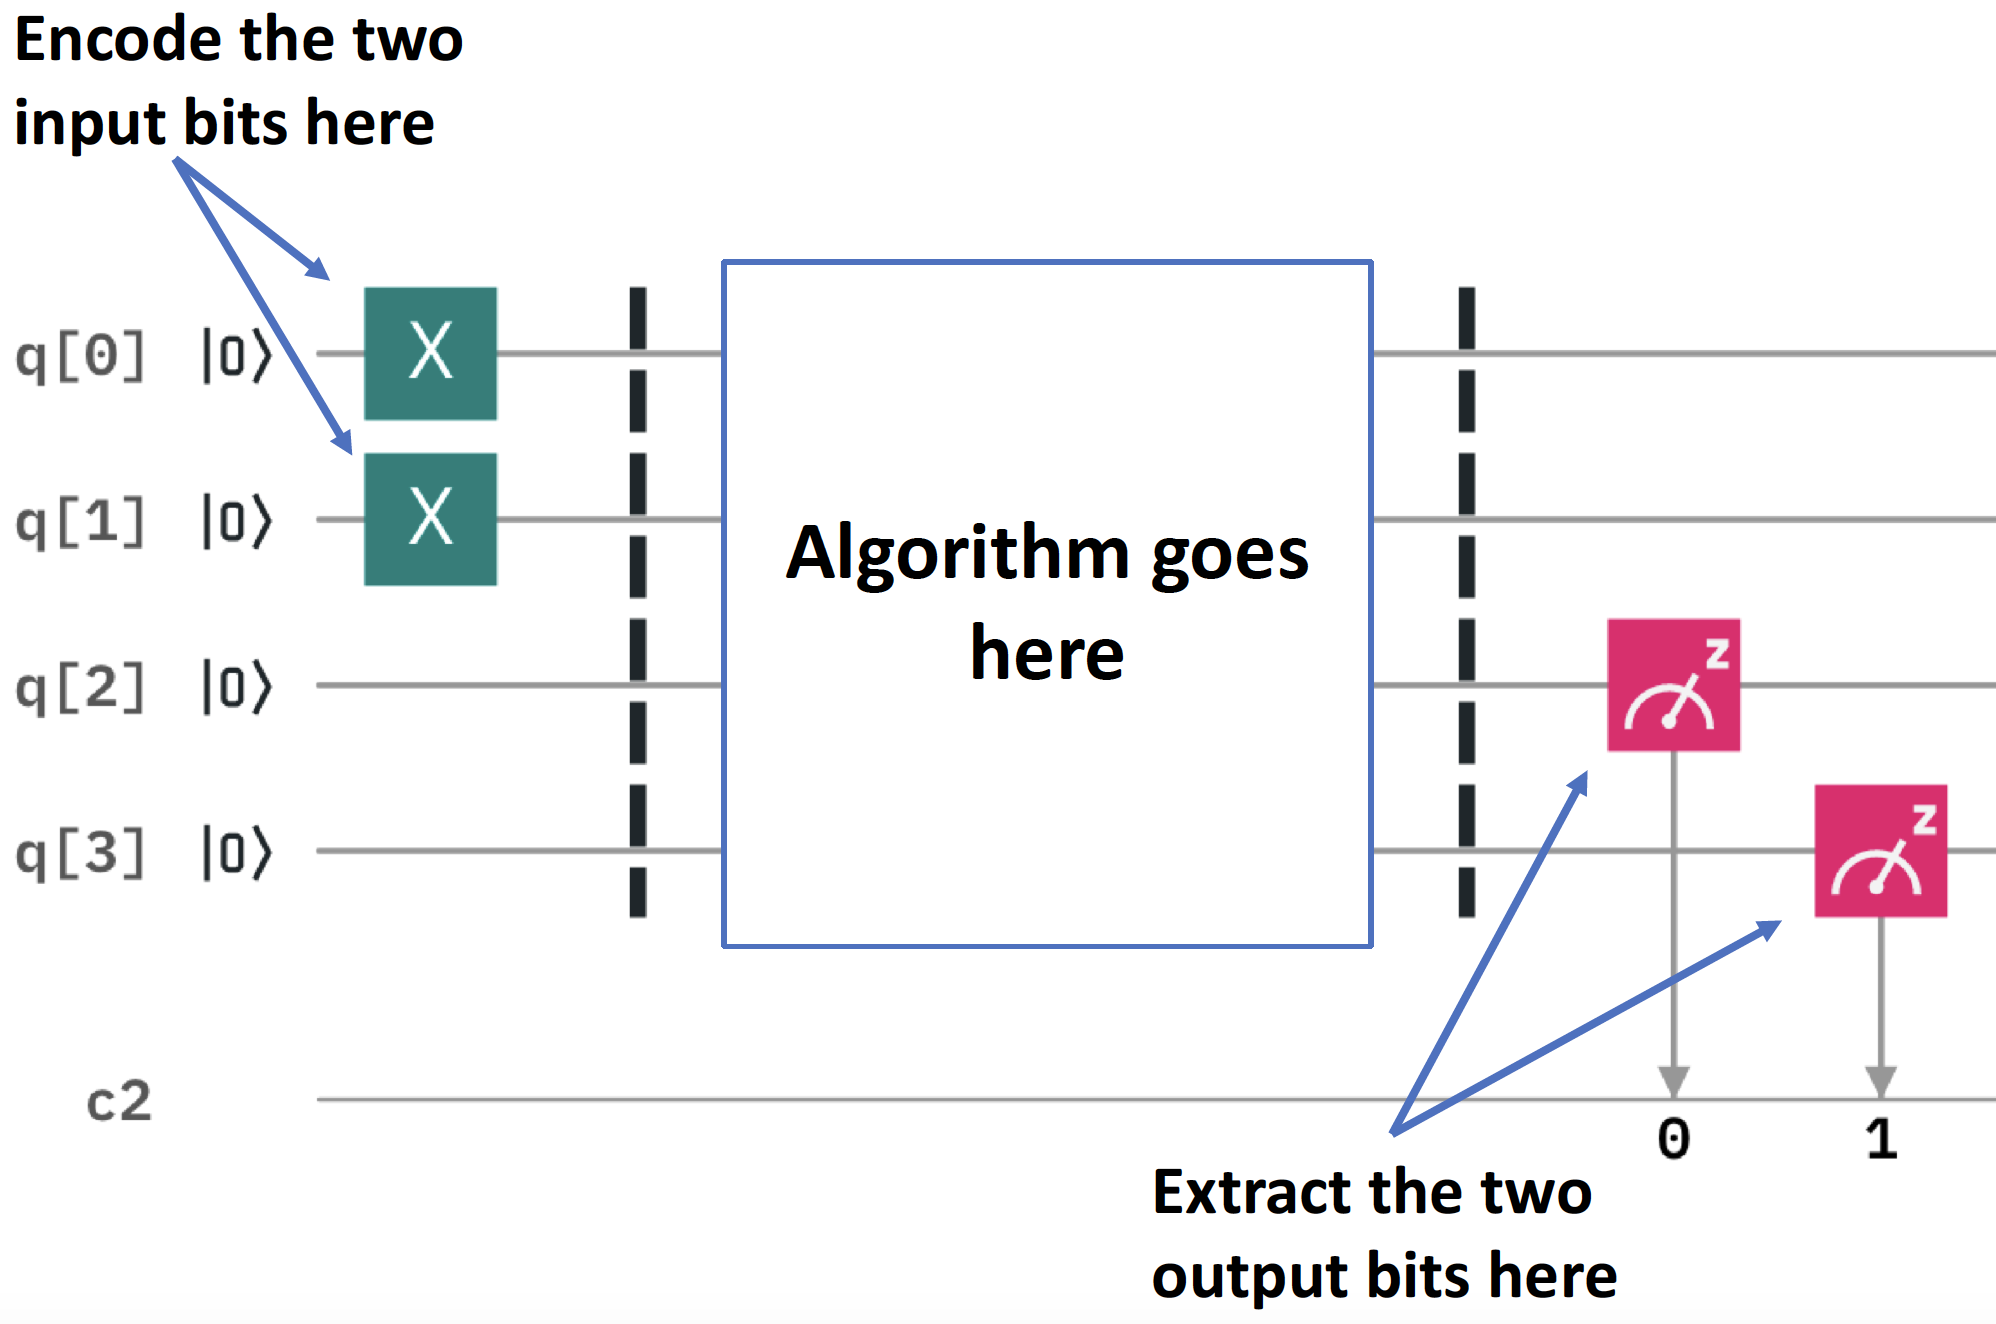

追加したい2つのビットは、qubit0とqubit1にエンコードされています。
上記の例では、このqubitの両方に1をエンコードしているため、1 + 1の解を求めています。
結果は2ビットの文字列になり、qubit2とqubit3から読み取られます。
残っているのは、真ん中の空白にある実際のプログラムを埋めることだけ。

画像の破線は、回路の部分を区別するためのものです。
(ただし、より興味深い使用法もある。)
それらは、バリアコマンドを使用して作成されます。

コンピューティングの基本的な操作は、論理ゲートとして知られています。
既にNOTゲートを使用していますが、half adderを作成するにはこれだけでは十分ではありません。
手動で回答を書き出すためにのみ使用できました。
しかし、コンピュータに実際の計算を行わせたいので、さらに強力なゲートが必要になります。

何が必要なのか確認するために、half adderが何をする必要があるのか、もう一度確認しましょう。

0 + 0 = 00
0 + 1 = 01
1 + 0 = 01
1 + 1 = 10

これら4つの答えの右端のビットは、追加する2つのビットが同じか異なるかによって完全に決まります。
従って、2つのビットが等しい0 +  0と1 + 1の場合、回答の右端のビットは0になります。
異なるビット値を追加する0 + 1と1 + 1の場合、右端のビットは1です。

問題を解く部分を作成するために、2つのビットが異なるかどうかを判断できるものが必要です。
従来、
デジタル計算の研究では、これは"XORゲート"と呼ばれていました。

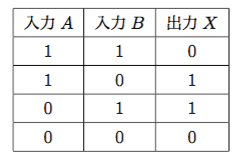

量子コンピュータでは、XORゲートの役割は制御されたNOTゲートによって行われます。
これは、かなり長い名前なので、通常"CNOT"と呼ばれます。
Qiskitでは、"cx"で、さらに短くされています。
回路図では下図のように描かれています。

In [10]:
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0,1)
qc_cnot.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

これは1組のqubitに適用されます。 1つは"Control qubit(制御キュービット)"(上図のq_0)として、もう1つは"Target qubit(ターゲットキュービット)"(上図のq_1)として機能する。

CNOTの効果を説明する方法は複数あります。
1つは、2つの入力ビットを調べて、それらが同じか異なるかを確認すること。
次に、target qubitに答えを上書きします。
もし同じなら0になり、異なるなら1になります。

CNOTを説明するもう1つの方法は、control qubitが1の場合は、target qubitに対してNOTを実行し、それ以外の場合は何もしないということです。
この説明は、前の説明と同じように有効的です。
(実際、CNOTという名前をつけたのはこの説明からです。)

可能な入力をそれぞれ入れて、CNOTを試してみてください。
例えば、入力を01でCNOTをテストする回路は次のとおりです。

In [11]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c_0: ═══════════╩══╬═
                   ║ 
c_1: ══════════════╩═

この回路を実行すると、出力が11であることがわかります。
これは、次のいずれかの理由によるものと考えられます。

・CNOTは、入力値が異なるかどうかを計算し、それらが異なることを検出します。つまり、1を出力する必要があることを意味する。これは、qubit1の状態を上書きすることによって行われる(ビット文字列の左側)。なので、01を11に変換している。

・CNOTはqubit0が1状態であることを認識し、qubit1にNOTを適用する。これにより、qubit1の0が1に反転し、01が11に変換される。

次の表は、CNOTの全ての可能な入力と対応する出力を示しています。

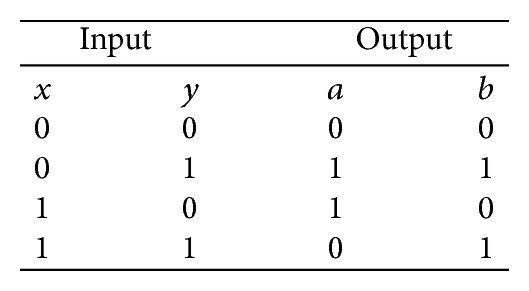

しかし、half adderでは、入力の1つを上書きしたくありません。
そのため、代わりに異なるqubitのペアに結果を書き込みたいと思います。
これには、2つのCNOTを使用できます。

In [13]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1)

qc_ha.draw()

┌───┐ ░            ░       
q_0: ┤ X ├─░───■────────░───────
     ├───┤ ░   │        ░       
q_1: ┤ X ├─░───┼────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐ ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├─░─┤M├───
           ░ └───┘└───┘ ░ └╥┘┌─┐
q_3: ──────░────────────░──╫─┤M├
           ░            ░  ║ └╥┘
c_0: ══════════════════════╩══╬═
                              ║ 
c_1: ═════════════════════════╩═

これで、完璧に機能するhalf adderの半分は完成しました。
出力のもう1つのビット、qubit4に存在するビットだけを残します。

4つの可能な合計をもう一度見ると、これが0ではなく1であるケースが1つだけあることがわかります。
1 + 1 = 10
追加するビットが両方とも1の時にのみ発生します。

出力のこの部分を計算するには、両方の入力が1であるかどうかをコンピュータに確認させるだけです。
2つの入力が両方1の場合に限り、qubit4でNOTゲートを実行する必要があります。
この場合にのみ、必要な値1にして、必要な出力を提供します。

これには、CNOTのように新たなゲートが必要だが、1つではなく2つのqubitで制御される。
これは、両方のcontrol qubitが1状態の場合にのみ、target qubitでNOTを実行する。この新しいゲートは"Toffoli"と呼ばれます。
"Boolean logic gates(ブール論理ゲート)"に慣れている人にとっては、基本的にはANDゲートです。

Qiskitでは、Toffoliは"ccx"というコマンドで表されます。

In [14]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw()

┌───┐ ░                 ░       
q_0: ┤ X ├─░───■─────────■───░───────
     ├───┤ ░   │         │   ░       
q_1: ┤ X ├─░───┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c_0: ═══════════════════════════╩══╬═
                                   ║ 
c_1: ══════════════════════════════╩═

この例では、2つの入力ビットがどちらも1であるため、1 + 1を計算しています。
何が得られるか見てみましょう。

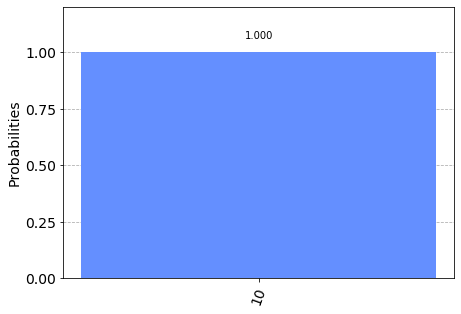

In [15]:
counts = execute(qc_ha,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

結果は10です。これは、10進法"2"のバイナリ表現です。
これで、1 + 1という有名な数学的問題を解くことができるコンピュータを構築できました！

これで、他の3つの入力も試してみて、アルゴリズムがこれらに対して正しい結果を与えることを示すことができます。

half adderには、加算に必要なものが全て含まれています。
"NOT", "CNOT", "Toffoli"などのゲートを使用すると、任意のサイズの任意の数のセットを追加するプログラムも作成できます。

これら3つのゲートは、コンピューティングの他のことを実行するのにも十分です。実際、CNOTがなくても実行できます。
NOTゲートは、値が1のビットを作成する場合にのみ必要です。
Toffoliゲートは、本質的に数学の原子です。
これは、他の全ての問題解決手法を組み込むことができる最も単純な要素です。

後で見るように、量子計算では原子を分割します。

In [17]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.14.1',
 'qiskit-aer': '0.5.2',
 'qiskit-ignis': '0.3.0',
 'qiskit-ibmq-provider': '0.7.2',
 'qiskit-aqua': '0.7.1',
 'qiskit': '0.19.3'}